<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
np.random.seed(42)

In [5]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [7]:
cali_df = pd.DataFrame(cali.data, columns = cali.feature_names)
cali_df['price'] = cali.target

In [8]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
cali_df.shape

(20640, 9)

### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and `y` into training and test sets

In [11]:
X = cali_df.drop(columns = ['price','Latitude','Longitude'])
y = cali_df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [14]:
model = Sequential([
    Input(shape = (X.shape[1],))
    , Dense(24, activation = 'relu')               # Hidden Layer with 24 nodes and ReLU
    , Dense(1, activation = 'linear')              # Output layer
])

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [16]:
model.compile(
    optimizer = 'adam'
    , loss = 'mean_squared_error'
    , metrics = ['mean_squared_error']
)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [19]:
history = model.fit(X_train
                    , y_train
                    , epochs = 100
                    , verbose = 0
                    , validation_data = (X_test, y_test)
                   )

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

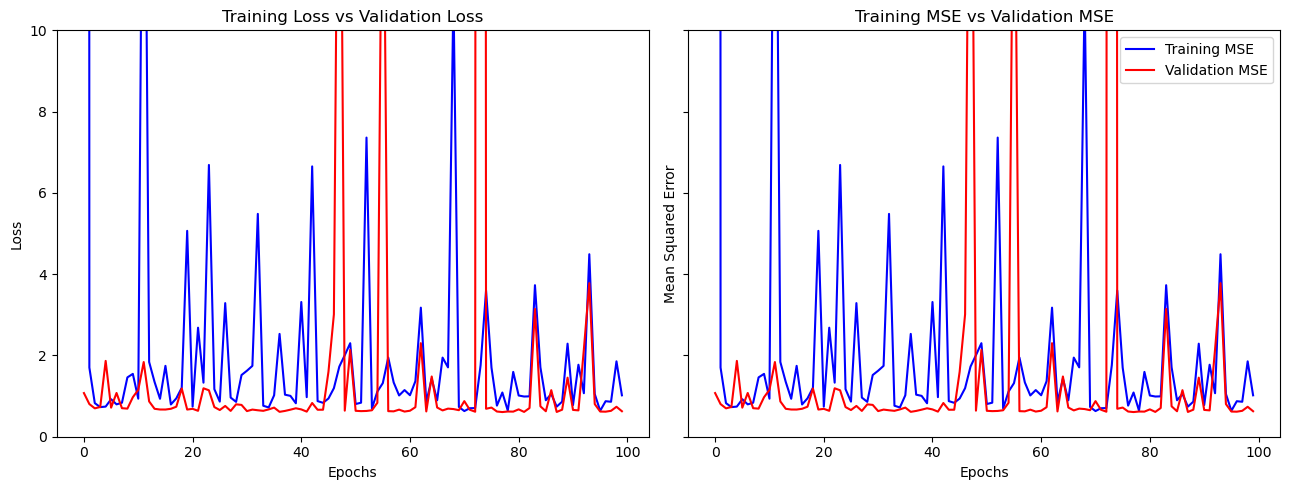

In [21]:
train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
train_mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey = True)

axes[0].plot(train_loss, label = 'Training Loss', color = 'blue')
axes[0].plot(val_loss, label = 'Validation Loss', color = 'red')
axes[0].set_title('Training Loss vs Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_ylim(0,10)

axes[1].plot(train_mse, label = 'Training MSE', color = 'blue')
axes[1].plot(val_mse, label = 'Validation MSE', color = 'red')
axes[1].set_title('Training MSE vs Validation MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

plt.tight_layout()
plt.show();

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [23]:
model2 = Sequential([
    Input(shape = (X.shape[1],))
    , Dense(64, activation = 'relu')               # Hidden Layer with 64 nodes and ReLU
    , Dense(128, activation = 'relu')              # Hidden Layer with 128 nodes and ReLU
    , Dense(64, activation = 'relu')               # Hidden Layer with 64 nodes and ReLU
    , Dense(1, activation = 'linear')              # Output layer
])

In [24]:
model2.compile(
    optimizer = 'adam'
    , loss = 'mean_squared_error'
    , metrics = ['mean_squared_error']
)

In [25]:
history2 = model2.fit(X_train
                    , y_train
                    , epochs = 100
                    , verbose = 0
                    , validation_data = (X_test, y_test)
                   )

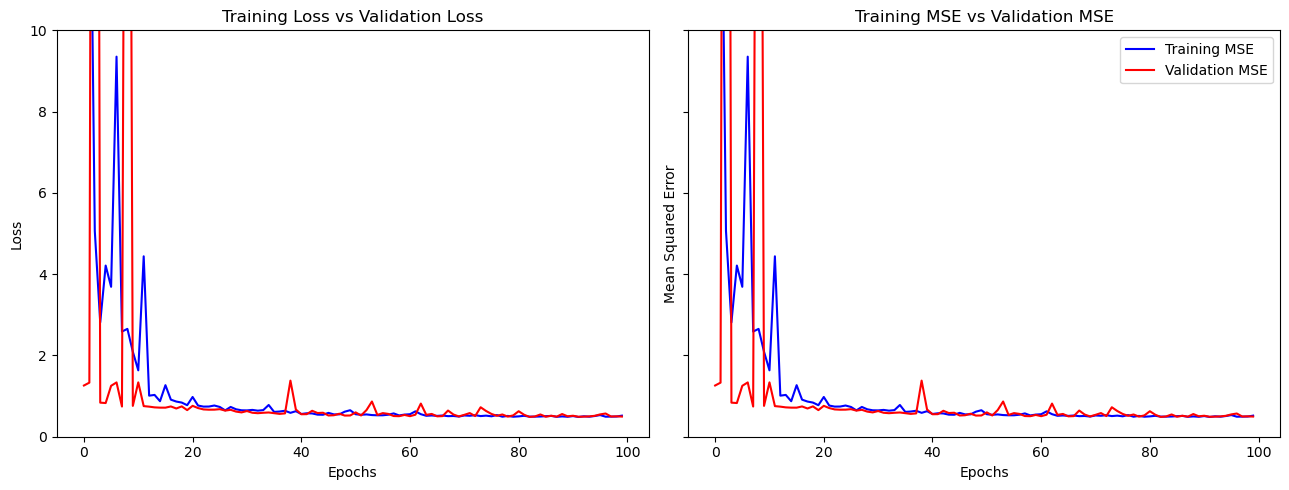

In [26]:
train_loss = history2.history['loss']
val_loss = history2.history['val_loss'] 
train_mse = history2.history['mean_squared_error']
val_mse = history2.history['val_mean_squared_error']

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey = True)

axes[0].plot(train_loss, label = 'Training Loss', color = 'blue')
axes[0].plot(val_loss, label = 'Validation Loss', color = 'red')
axes[0].set_title('Training Loss vs Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_ylim(0,10)

axes[1].plot(train_mse, label = 'Training MSE', color = 'blue')
axes[1].plot(val_mse, label = 'Validation MSE', color = 'red')
axes[1].set_title('Training MSE vs Validation MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

plt.tight_layout()
plt.show();

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

In [28]:
model3 = Sequential([
    Input(shape = (X.shape[1],))                  # Input Layer
    , BatchNormalization()                        # BatchNormalization Layer
    , Dense(64, activation='relu')                # Hidden Layer with 64 nodes and ReLU
    , Dense(128, activation='relu')               # Hidden Layer with 128 nodes and ReLU
    , Dense(64, activation='relu')                # Hidden Layer with 64 nodes and ReLU
    , Dense(1, activation='linear')               # Output layer
])

model3.compile(
    optimizer = 'adam'
    , loss = 'mean_squared_error'
    , metrics = ['mean_squared_error']
)

history3 = model3.fit(X_train
                      , y_train
                      , epochs = 100
                      , verbose = 0
                      , validation_data = (X_test, y_test)
)

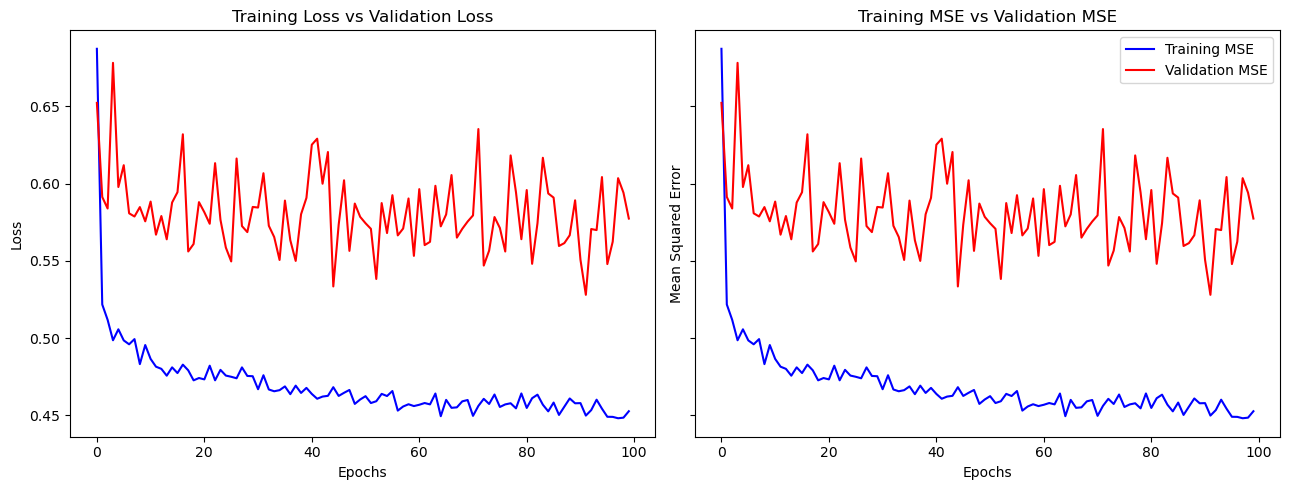

In [29]:
train_loss = history3.history['loss']
val_loss = history3.history['val_loss'] 
train_mse = history3.history['mean_squared_error']
val_mse = history3.history['val_mean_squared_error']

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey = True)

axes[0].plot(train_loss, label = 'Training Loss', color = 'blue')
axes[0].plot(val_loss, label = 'Validation Loss', color = 'red')
axes[0].set_title('Training Loss vs Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
#axes[0].set_ylim(0,10)

axes[1].plot(train_mse, label = 'Training MSE', color = 'blue')
axes[1].plot(val_mse, label = 'Validation MSE', color = 'red')
axes[1].set_title('Training MSE vs Validation MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

plt.tight_layout()
plt.show();

##### Does this change anything?

In [39]:
# The Loss is low at the very first epochs

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [47]:
es = EarlyStopping(
    monitor = 'val_loss'
    , patience = 5
    , restore_best_weights = True 
)

model4 = Sequential([
    Input(shape = (X.shape[1],))                  # Input Layer
    , BatchNormalization()                        # BatchNormalization Layer
    , Dense(64, activation='relu')                # Hidden Layer with 64 nodes and ReLU
    , Dense(128, activation='relu')               # Hidden Layer with 128 nodes and ReLU
    , Dense(64, activation='relu')                # Hidden Layer with 64 nodes and ReLU
    , Dense(1, activation='linear')               # Output layer
])

model4.compile(
    optimizer = 'adam'
    , loss = 'mean_squared_error'
    , metrics = ['mean_squared_error']
)


history4 = model4.fit(
    X_train
    , y_train
    , epochs = 100
    , verbose = 0
    , validation_data = (X_test, y_test)
    , callbacks = [es]
)

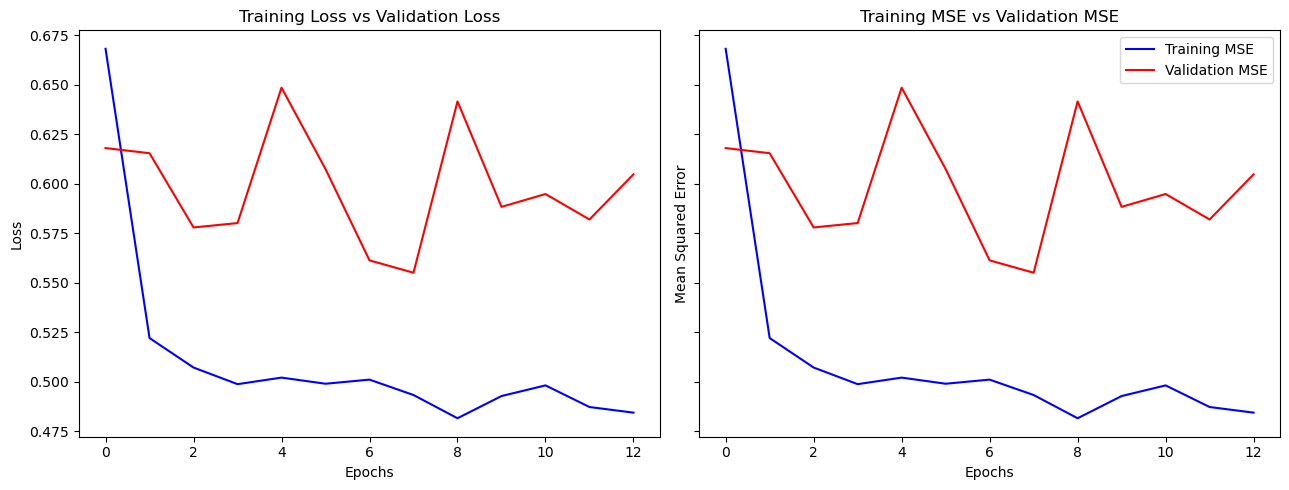

In [51]:
train_loss = history4.history['loss']
val_loss = history4.history['val_loss'] 
train_mse = history4.history['mean_squared_error']
val_mse = history4.history['val_mean_squared_error']

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey = True)

axes[0].plot(train_loss, label = 'Training Loss', color = 'blue')
axes[0].plot(val_loss, label = 'Validation Loss', color = 'red')
axes[0].set_title('Training Loss vs Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
#axes[0].set_ylim(0,10)

axes[1].plot(train_mse, label = 'Training MSE', color = 'blue')
axes[1].plot(val_mse, label = 'Validation MSE', color = 'red')
axes[1].set_title('Training MSE vs Validation MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

plt.tight_layout()
plt.show();

**How many epochs do you think are appropriate?**

In [ ]:
# 12 epochs. Because the model early stop at 12th epoch. Validation loss didn't improve for 5 epochs.

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [53]:
model5 = Sequential([
    Input(shape=(X.shape[1],))                     # Input Layer
    , BatchNormalization()                         # BatchNormalization Layer
    , Dense(64, activation = 'relu')               # Hidden Layer with 64 nodes and ReLU
    , Dropout(0.05)                                # 5% Dropout
    , Dense(128, activation = 'relu')              # Hidden Layer with 128 nodes and ReLU
    , Dropout(0.20)                                # 20% Dropout
    , Dense(64, activation = 'relu')               # Hidden Layer with 64 nodes and ReLU
    , Dense(1, activation = 'linear')              # Output layer
])

model5.compile(
    optimizer = 'adam'
    , loss = 'mean_squared_error'
    , metrics = ['mean_squared_error']
)

history5 = model5.fit(
    X_train
    , y_train
    , epochs = 100
    , verbose = 0
    , validation_data = (X_test, y_test)
    , callbacks=[es]
)

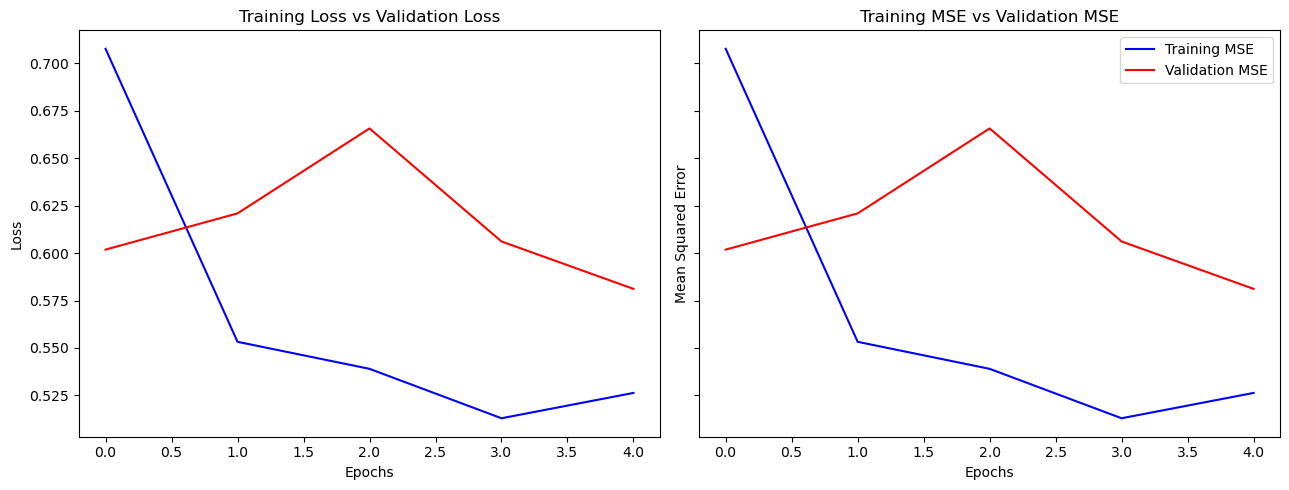

In [55]:
train_loss = history5.history['loss']
val_loss = history5.history['val_loss'] 
train_mse = history5.history['mean_squared_error']
val_mse = history5.history['val_mean_squared_error']

fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharey = True)

axes[0].plot(train_loss, label = 'Training Loss', color = 'blue')
axes[0].plot(val_loss, label = 'Validation Loss', color = 'red')
axes[0].set_title('Training Loss vs Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
#axes[0].set_ylim(0,10)

axes[1].plot(train_mse, label = 'Training MSE', color = 'blue')
axes[1].plot(val_mse, label = 'Validation MSE', color = 'red')
axes[1].set_title('Training MSE vs Validation MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

plt.tight_layout()
plt.show();

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [59]:
# Baseline model = model
y_pred_baseline = model.predict(X_test, verbose = 0)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))

# Optimized model = model5
y_pred_optimized = model5.predict(X_test, verbose = 0)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))

In [61]:
# Improve 0.02
print(rmse_baseline, rmse_optimized)

0.7919747485455462 0.7757998454847428


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [63]:
model6 = Sequential([
    Input(shape=(X.shape[1],))                                                    # Input Layer
    , BatchNormalization()                                                        # BatchNormalization Layer
    , Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))               # Hidden Layer with 64 nodes and ReLU and l2
    , Dropout(0.05)                                                               # 5% Dropout
    , Dense(128, activation = 'relu', kernel_regularizer = l2(0.01))              # Hidden Layer with 128 nodes and ReLU and l2
    , Dropout(0.20)                                                               # 20% Dropout
    , Dense(64, activation = 'relu', kernel_regularizer = l2(0.01))               # Hidden Layer with 64 nodes and ReLU and l2
    , Dense(1, activation = 'linear')                                             # Output layer
])

model6.compile(
    optimizer = 'adam'
    , loss = 'mean_squared_error'
    , metrics = ['mean_squared_error']
)

history6 = model6.fit(
    X_train
    , y_train
    , epochs = 100
    , verbose = 0
    , validation_data = (X_test, y_test)
    , callbacks=[es]
)

In [65]:
# New Optimized model = model6
y_pred_optimized_new = model6.predict(X_test, verbose = 0)
rmse_optimized_new = np.sqrt(mean_squared_error(y_test, y_pred_optimized_new))

In [67]:
# Improve 0.03
print(rmse_baseline, rmse_optimized_new)

0.7919747485455462 0.7663520670477679


### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [71]:
from tensorflow.keras.models import save_model
# save_model(model6, 'cali_housing.h5')
save_model(model6, 'cali_housing.keras')